In [41]:
!pip install word2number

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from word2number import w2n
import numpy as np

In [3]:
df1 = pd.read_csv('homeprices.csv')

In [4]:
df1.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [13]:
# Data Preprocessing

In [10]:
median_value = df1['bedrooms'].median() #Can not take average because we need number in discrete form

In [12]:
df1['bedrooms'].fillna(median_value,inplace = True)

C:\Users\APU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


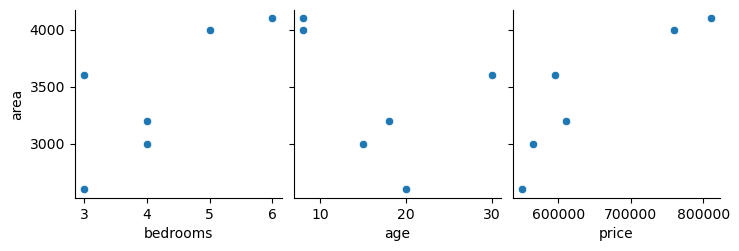

In [36]:
sns.pairplot(data= df1,x_vars=['bedrooms','age','price'],y_vars='area')
plt.show()

In [14]:
reg = linear_model.LinearRegression()

In [19]:
reg.fit(df1[['area','bedrooms','age']].values,df1['price'])

LinearRegression()

In [16]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [17]:
reg.intercept_

221323.00186540408

In [22]:
reg.predict([[3500,3,35]])

array([570598.06209454])

In [37]:
df2= pd.read_csv('hiring.csv')

In [68]:
df2.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [81]:
df2.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
experience_num                0
dtype: int64

In [75]:
experience_num = list()
for i in df2['experience']:
    if i is np.NaN:
        experience_num.append(i)
    else:
        experience_num.append(w2n.word_to_num(i))
df2['experience_num'] = experience_num
    

In [76]:
df2.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($),experience_num
0,NaN,8.0,9,50000,NaN
1,NaN,8.0,6,45000,NaN
2,five,6.0,7,60000,5.0
3,two,10.0,10,65000,2.0
4,seven,9.0,6,70000,7.0


In [78]:
df2['experience_num'].fillna(df2['experience_num'].mean(),inplace = True)

In [82]:
df2['test_score(out of 10)'].fillna(df2['test_score(out of 10)'].mean(),inplace = True)

In [83]:
df2.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($),experience_num
0,NaN,8.0,9,50000,6.333333
1,NaN,8.0,6,45000,6.333333
2,five,6.0,7,60000,5.000000
3,two,10.0,10,65000,2.000000
4,seven,9.0,6,70000,7.000000


In [84]:
reg.fit(df2[['experience_num','test_score(out of 10)','interview_score(out of 10)']].values,df2['salary($)'])

LinearRegression()

In [85]:
reg.predict([[7,10,10]])

array([73259.39913963])